In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import transforms
from tqdm.auto import tqdm

from continual_utils import Continual_Util
from datasets.CIFAR import get_CIFAR100
from models.neural import DNN
from train_continual import get_args, train, evaluate
from utils import set_seed, get_gpu_with_max_free_memory

In [2]:
from copy import deepcopy
import os

import torch
from tqdm.auto import tqdm

from train_continual import main, get_args
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from utils import adjust_plots


use_pretrained_backbone = True

args = get_args(run_in_notebook=True)
args.dataset = 'CIFAR100'
args.iid = 1
args.overlap = 0
args.perm = 1.0

args.backbone = 'Resnet18'
args.samples = 0
args.fixed_mem = 0
args.lr = 1e-2
args.reset = 1
args.tasks = 10
args.classes = 10
args.noise = 0.0
args.k = 64
args.augmentation = 0

seeds = [101, 102, 103]

assert use_pretrained_backbone
widths = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096,]
l = 3
assert not (widths[-1] > 8192 and l > 3), "CUDA memory error"

assert args.dataset == 'CIFAR100' and args.backbone == 'Resnet18', "Pretrained backbone only available for CIFAR100 Resnet"
backbone_path = 'backbones/CIFAR10_Resnet18_Pretrain.torch'
# assert file is present
assert os.path.isfile(backbone_path), "Pretrained backbone not found"
args.load_back = backbone_path
args.freeze_back = 1


assert l == 3
layers = [
    ([1, 1, 1], 'domain'),
    ([0, 1, 1], 'domain'),
    ([1, 0, 1], 'domain'),
    ([1, 1, 0], 'domain'),
    ([1, 1, 1], 'task'),
    ]



train_accs = torch.zeros (len(seeds), len(widths), len(layers))
test_accs = torch.zeros (len(seeds), len(widths), len(layers))

train_losses = torch.zeros (len(seeds), len(widths), len(layers))
test_losses = torch.zeros (len(seeds), len(widths), len(layers))

for s, seed in enumerate(seeds):
    args.seed = seed
    for idx, layer in enumerate(layers):
        for j, k in enumerate(tqdm(widths)):
            print(f"Running seed {seed}, layer {layer}, width {k}")
            
            args.hidden = [k] * l
            args.shared, args.scenario = layer


            args.exp_name = (f"exp2_seed_{args.seed}_dataset_{args.dataset}_task_{args.tasks}_classes_{args.classes}"
                            f"_perm_{args.perm}_samples_{args.samples}"
                            f"_iid_{args.iid}_scenario_{args.scenario}_arch_{args.backbone}"
                            f"_k_{args.k}_noise_{args.noise}"
                            f"_hidden_{args.hidden}_shared_{args.shared}_loadback_{use_pretrained_backbone}_freezeback_{args.freeze_back}")

            args.save_mlp = "output/" + args.exp_name + "/mlp.torch"

            args.save = args.exp_name
            # tqdm.write(f"--------------------- Running {args.exp_name} --------------------")
            
            
            cl_util = Continual_Util(args.classes, args.dataset, args.tasks, args.scenario)

            args.cl_util = cl_util
            
            args.num_input_channels = 3
                        
            d = torch.load(f"save/{args.save}.torch")

            final_epoch = d['task_epochs'][-1]

            train_accs[s, j, idx] = d['train_acc'][final_epoch]
            test_accs[s, j, idx] = d['test_acc'][final_epoch]

            train_losses[s, j, idx] = d['train_loss'][final_epoch]
            test_losses[s, j, idx] = d['test_loss'][final_epoch]

train_accs = train_accs.mean(0) * 100
test_accs = test_accs.mean(0) * 100

train_losses = train_losses.mean(0)
test_losses = test_losses.mean(0)

  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 101, layer ([1, 1, 1], 'domain'), width 1
Running seed 101, layer ([1, 1, 1], 'domain'), width 2
Running seed 101, layer ([1, 1, 1], 'domain'), width 4
Running seed 101, layer ([1, 1, 1], 'domain'), width 8
Running seed 101, layer ([1, 1, 1], 'domain'), width 16
Running seed 101, layer ([1, 1, 1], 'domain'), width 32
Running seed 101, layer ([1, 1, 1], 'domain'), width 64
Running seed 101, layer ([1, 1, 1], 'domain'), width 128
Running seed 101, layer ([1, 1, 1], 'domain'), width 256
Running seed 101, layer ([1, 1, 1], 'domain'), width 512
Running seed 101, layer ([1, 1, 1], 'domain'), width 1024
Running seed 101, layer ([1, 1, 1], 'domain'), width 2048
Running seed 101, layer ([1, 1, 1], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 101, layer ([0, 1, 1], 'domain'), width 1
Running seed 101, layer ([0, 1, 1], 'domain'), width 2
Running seed 101, layer ([0, 1, 1], 'domain'), width 4
Running seed 101, layer ([0, 1, 1], 'domain'), width 8
Running seed 101, layer ([0, 1, 1], 'domain'), width 16
Running seed 101, layer ([0, 1, 1], 'domain'), width 32
Running seed 101, layer ([0, 1, 1], 'domain'), width 64
Running seed 101, layer ([0, 1, 1], 'domain'), width 128
Running seed 101, layer ([0, 1, 1], 'domain'), width 256
Running seed 101, layer ([0, 1, 1], 'domain'), width 512
Running seed 101, layer ([0, 1, 1], 'domain'), width 1024
Running seed 101, layer ([0, 1, 1], 'domain'), width 2048
Running seed 101, layer ([0, 1, 1], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 101, layer ([1, 0, 1], 'domain'), width 1
Running seed 101, layer ([1, 0, 1], 'domain'), width 2
Running seed 101, layer ([1, 0, 1], 'domain'), width 4
Running seed 101, layer ([1, 0, 1], 'domain'), width 8
Running seed 101, layer ([1, 0, 1], 'domain'), width 16
Running seed 101, layer ([1, 0, 1], 'domain'), width 32
Running seed 101, layer ([1, 0, 1], 'domain'), width 64
Running seed 101, layer ([1, 0, 1], 'domain'), width 128
Running seed 101, layer ([1, 0, 1], 'domain'), width 256
Running seed 101, layer ([1, 0, 1], 'domain'), width 512
Running seed 101, layer ([1, 0, 1], 'domain'), width 1024
Running seed 101, layer ([1, 0, 1], 'domain'), width 2048
Running seed 101, layer ([1, 0, 1], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 101, layer ([1, 1, 0], 'domain'), width 1
Running seed 101, layer ([1, 1, 0], 'domain'), width 2
Running seed 101, layer ([1, 1, 0], 'domain'), width 4
Running seed 101, layer ([1, 1, 0], 'domain'), width 8
Running seed 101, layer ([1, 1, 0], 'domain'), width 16
Running seed 101, layer ([1, 1, 0], 'domain'), width 32
Running seed 101, layer ([1, 1, 0], 'domain'), width 64
Running seed 101, layer ([1, 1, 0], 'domain'), width 128
Running seed 101, layer ([1, 1, 0], 'domain'), width 256
Running seed 101, layer ([1, 1, 0], 'domain'), width 512
Running seed 101, layer ([1, 1, 0], 'domain'), width 1024
Running seed 101, layer ([1, 1, 0], 'domain'), width 2048
Running seed 101, layer ([1, 1, 0], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 101, layer ([1, 1, 1], 'task'), width 1
Running seed 101, layer ([1, 1, 1], 'task'), width 2
Running seed 101, layer ([1, 1, 1], 'task'), width 4
Running seed 101, layer ([1, 1, 1], 'task'), width 8
Running seed 101, layer ([1, 1, 1], 'task'), width 16
Running seed 101, layer ([1, 1, 1], 'task'), width 32
Running seed 101, layer ([1, 1, 1], 'task'), width 64
Running seed 101, layer ([1, 1, 1], 'task'), width 128
Running seed 101, layer ([1, 1, 1], 'task'), width 256
Running seed 101, layer ([1, 1, 1], 'task'), width 512
Running seed 101, layer ([1, 1, 1], 'task'), width 1024
Running seed 101, layer ([1, 1, 1], 'task'), width 2048
Running seed 101, layer ([1, 1, 1], 'task'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 102, layer ([1, 1, 1], 'domain'), width 1
Running seed 102, layer ([1, 1, 1], 'domain'), width 2
Running seed 102, layer ([1, 1, 1], 'domain'), width 4
Running seed 102, layer ([1, 1, 1], 'domain'), width 8
Running seed 102, layer ([1, 1, 1], 'domain'), width 16
Running seed 102, layer ([1, 1, 1], 'domain'), width 32
Running seed 102, layer ([1, 1, 1], 'domain'), width 64
Running seed 102, layer ([1, 1, 1], 'domain'), width 128
Running seed 102, layer ([1, 1, 1], 'domain'), width 256
Running seed 102, layer ([1, 1, 1], 'domain'), width 512
Running seed 102, layer ([1, 1, 1], 'domain'), width 1024
Running seed 102, layer ([1, 1, 1], 'domain'), width 2048
Running seed 102, layer ([1, 1, 1], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 102, layer ([0, 1, 1], 'domain'), width 1
Running seed 102, layer ([0, 1, 1], 'domain'), width 2
Running seed 102, layer ([0, 1, 1], 'domain'), width 4
Running seed 102, layer ([0, 1, 1], 'domain'), width 8
Running seed 102, layer ([0, 1, 1], 'domain'), width 16
Running seed 102, layer ([0, 1, 1], 'domain'), width 32
Running seed 102, layer ([0, 1, 1], 'domain'), width 64
Running seed 102, layer ([0, 1, 1], 'domain'), width 128
Running seed 102, layer ([0, 1, 1], 'domain'), width 256
Running seed 102, layer ([0, 1, 1], 'domain'), width 512
Running seed 102, layer ([0, 1, 1], 'domain'), width 1024
Running seed 102, layer ([0, 1, 1], 'domain'), width 2048
Running seed 102, layer ([0, 1, 1], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 102, layer ([1, 0, 1], 'domain'), width 1
Running seed 102, layer ([1, 0, 1], 'domain'), width 2
Running seed 102, layer ([1, 0, 1], 'domain'), width 4
Running seed 102, layer ([1, 0, 1], 'domain'), width 8
Running seed 102, layer ([1, 0, 1], 'domain'), width 16
Running seed 102, layer ([1, 0, 1], 'domain'), width 32
Running seed 102, layer ([1, 0, 1], 'domain'), width 64
Running seed 102, layer ([1, 0, 1], 'domain'), width 128
Running seed 102, layer ([1, 0, 1], 'domain'), width 256
Running seed 102, layer ([1, 0, 1], 'domain'), width 512
Running seed 102, layer ([1, 0, 1], 'domain'), width 1024
Running seed 102, layer ([1, 0, 1], 'domain'), width 2048
Running seed 102, layer ([1, 0, 1], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 102, layer ([1, 1, 0], 'domain'), width 1
Running seed 102, layer ([1, 1, 0], 'domain'), width 2
Running seed 102, layer ([1, 1, 0], 'domain'), width 4
Running seed 102, layer ([1, 1, 0], 'domain'), width 8
Running seed 102, layer ([1, 1, 0], 'domain'), width 16
Running seed 102, layer ([1, 1, 0], 'domain'), width 32
Running seed 102, layer ([1, 1, 0], 'domain'), width 64
Running seed 102, layer ([1, 1, 0], 'domain'), width 128
Running seed 102, layer ([1, 1, 0], 'domain'), width 256
Running seed 102, layer ([1, 1, 0], 'domain'), width 512
Running seed 102, layer ([1, 1, 0], 'domain'), width 1024
Running seed 102, layer ([1, 1, 0], 'domain'), width 2048
Running seed 102, layer ([1, 1, 0], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 102, layer ([1, 1, 1], 'task'), width 1
Running seed 102, layer ([1, 1, 1], 'task'), width 2
Running seed 102, layer ([1, 1, 1], 'task'), width 4
Running seed 102, layer ([1, 1, 1], 'task'), width 8
Running seed 102, layer ([1, 1, 1], 'task'), width 16
Running seed 102, layer ([1, 1, 1], 'task'), width 32
Running seed 102, layer ([1, 1, 1], 'task'), width 64
Running seed 102, layer ([1, 1, 1], 'task'), width 128
Running seed 102, layer ([1, 1, 1], 'task'), width 256
Running seed 102, layer ([1, 1, 1], 'task'), width 512
Running seed 102, layer ([1, 1, 1], 'task'), width 1024
Running seed 102, layer ([1, 1, 1], 'task'), width 2048
Running seed 102, layer ([1, 1, 1], 'task'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 103, layer ([1, 1, 1], 'domain'), width 1
Running seed 103, layer ([1, 1, 1], 'domain'), width 2
Running seed 103, layer ([1, 1, 1], 'domain'), width 4
Running seed 103, layer ([1, 1, 1], 'domain'), width 8
Running seed 103, layer ([1, 1, 1], 'domain'), width 16
Running seed 103, layer ([1, 1, 1], 'domain'), width 32
Running seed 103, layer ([1, 1, 1], 'domain'), width 64
Running seed 103, layer ([1, 1, 1], 'domain'), width 128
Running seed 103, layer ([1, 1, 1], 'domain'), width 256
Running seed 103, layer ([1, 1, 1], 'domain'), width 512
Running seed 103, layer ([1, 1, 1], 'domain'), width 1024
Running seed 103, layer ([1, 1, 1], 'domain'), width 2048
Running seed 103, layer ([1, 1, 1], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 103, layer ([0, 1, 1], 'domain'), width 1
Running seed 103, layer ([0, 1, 1], 'domain'), width 2
Running seed 103, layer ([0, 1, 1], 'domain'), width 4
Running seed 103, layer ([0, 1, 1], 'domain'), width 8
Running seed 103, layer ([0, 1, 1], 'domain'), width 16
Running seed 103, layer ([0, 1, 1], 'domain'), width 32
Running seed 103, layer ([0, 1, 1], 'domain'), width 64
Running seed 103, layer ([0, 1, 1], 'domain'), width 128
Running seed 103, layer ([0, 1, 1], 'domain'), width 256
Running seed 103, layer ([0, 1, 1], 'domain'), width 512
Running seed 103, layer ([0, 1, 1], 'domain'), width 1024
Running seed 103, layer ([0, 1, 1], 'domain'), width 2048
Running seed 103, layer ([0, 1, 1], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 103, layer ([1, 0, 1], 'domain'), width 1
Running seed 103, layer ([1, 0, 1], 'domain'), width 2
Running seed 103, layer ([1, 0, 1], 'domain'), width 4
Running seed 103, layer ([1, 0, 1], 'domain'), width 8
Running seed 103, layer ([1, 0, 1], 'domain'), width 16
Running seed 103, layer ([1, 0, 1], 'domain'), width 32
Running seed 103, layer ([1, 0, 1], 'domain'), width 64
Running seed 103, layer ([1, 0, 1], 'domain'), width 128
Running seed 103, layer ([1, 0, 1], 'domain'), width 256
Running seed 103, layer ([1, 0, 1], 'domain'), width 512
Running seed 103, layer ([1, 0, 1], 'domain'), width 1024
Running seed 103, layer ([1, 0, 1], 'domain'), width 2048
Running seed 103, layer ([1, 0, 1], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 103, layer ([1, 1, 0], 'domain'), width 1
Running seed 103, layer ([1, 1, 0], 'domain'), width 2
Running seed 103, layer ([1, 1, 0], 'domain'), width 4
Running seed 103, layer ([1, 1, 0], 'domain'), width 8
Running seed 103, layer ([1, 1, 0], 'domain'), width 16
Running seed 103, layer ([1, 1, 0], 'domain'), width 32
Running seed 103, layer ([1, 1, 0], 'domain'), width 64
Running seed 103, layer ([1, 1, 0], 'domain'), width 128
Running seed 103, layer ([1, 1, 0], 'domain'), width 256
Running seed 103, layer ([1, 1, 0], 'domain'), width 512
Running seed 103, layer ([1, 1, 0], 'domain'), width 1024
Running seed 103, layer ([1, 1, 0], 'domain'), width 2048
Running seed 103, layer ([1, 1, 0], 'domain'), width 4096


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 103, layer ([1, 1, 1], 'task'), width 1
Running seed 103, layer ([1, 1, 1], 'task'), width 2
Running seed 103, layer ([1, 1, 1], 'task'), width 4
Running seed 103, layer ([1, 1, 1], 'task'), width 8
Running seed 103, layer ([1, 1, 1], 'task'), width 16
Running seed 103, layer ([1, 1, 1], 'task'), width 32
Running seed 103, layer ([1, 1, 1], 'task'), width 64
Running seed 103, layer ([1, 1, 1], 'task'), width 128
Running seed 103, layer ([1, 1, 1], 'task'), width 256
Running seed 103, layer ([1, 1, 1], 'task'), width 512
Running seed 103, layer ([1, 1, 1], 'task'), width 1024
Running seed 103, layer ([1, 1, 1], 'task'), width 2048
Running seed 103, layer ([1, 1, 1], 'task'), width 4096


In [3]:
torch.cuda.empty_cache()

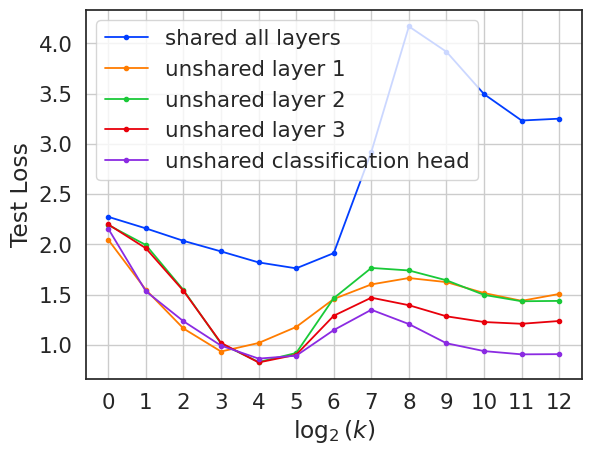

In [4]:
import seaborn as sns

widths_ = np.array(widths)

widths_ = np.log2(widths_)
x_label = r'$\log_2 (k)$'
x_ticks = widths_
adjust_plots()
t = -1
colors = sns.color_palette("tab10", n_colors=30)
for layer in range(0, 5):
    t += 1
    
    if layer == 0:
        label = 'shared all layers'
    elif 1 <= layer <= 3:
        label = f'unshared layer {layer}'
    else:
        label = 'unshared classification head'
    
    color = colors[t]
    
    plt.plot(widths_, test_losses[:, layer], '.-', label=f'{label}')#, color=color)
plt.xlabel(x_label)
plt.xticks(x_ticks)
plt.ylabel('Test Loss')
plt.legend()

plt.grid()
# plt.savefig(f'Figs/Appendix/exp2_test_loss.png', bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

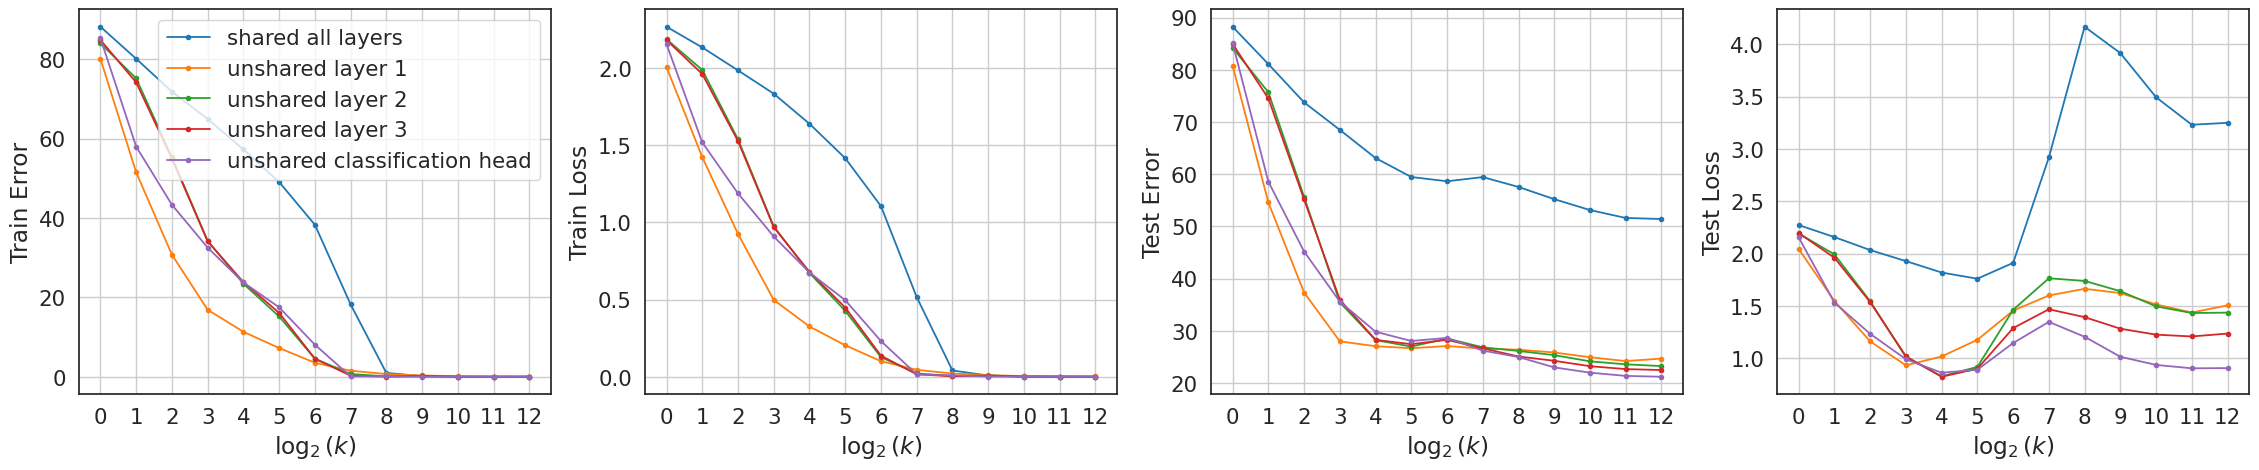

savedexp2_seed_103_dataset_CIFAR100_task_10_classes_10_perm_1.0_samples_0_iid_1_scenario_task_arch_Resnet18_k_64_noise_0.0_hidden_[4096, 4096, 4096]_shared_[1, 1, 1]_loadback_True_freezeback_1_multi_vs_single.png


In [5]:
widths_ = np.array(widths)
widths_ = np.log2(widths_)
x_label = r'$\log_2 (k)$'
x_ticks = widths_

adjust_plots()
fig, axs = plt.subplots(1, 4, figsize=(28, 5))

t = -1

axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[3].grid()

max_loss = test_losses.max() + 0.1
min_loss = train_losses.min() - 0.1
colors = sns.color_palette("tab10", n_colors=30)
for layer in range(0,5):
        t += 1
        color = colors[t]

        if layer == 0:
            label = 'shared all layers'
        elif 1 <= layer <= 3:
            label = f'unshared layer {layer}'
        else:
            label = 'unshared classification head'


        axs[0].plot(widths_, 100 - train_accs[:, layer], '.-', label=f'{label}', color=color)
        axs[0].set_xlabel(x_label)
        axs[0].set_ylabel('Train Error')
        axs[0].legend()
        axs[0].set_xticks(x_ticks)
        # axs[0, 0].locator_params(axis='y', nbins=5)
        # axs[0, 0].set_ylim([-5, 100])


        axs[2].plot(widths_, 100 - test_accs[:, layer], '.-', label=f'{label}', color=color)
        axs[2].set_xlabel(x_label)
        axs[2].set_ylabel('Test Error')
        axs[2].set_xticks(x_ticks)
        # axs[0, 1].locator_params(axis='y', nbins=5)
        # axs[0, 1].set_ylim([-5, 100])


        axs[1].plot(widths_, train_losses[:, layer], '.-', label=f'{label}', color=color)
        axs[1].set_xlabel(x_label)
        axs[1].set_ylabel('Train Loss')
        axs[1].set_xticks(x_ticks)
        # axs[1, 0].locator_params(axis='y', nbins=5)
        # axs[1, 0].set_ylim([min_loss, max_loss])


        axs[3].plot(widths_, test_losses[:, layer], '.-', label=f'{label}', color=color)
        axs[3].set_xlabel(x_label)
        axs[3].set_ylabel('Test Loss')
        axs[3].set_xticks(x_ticks)
        # axs[1, 1].locator_params(axis='y', nbins=5)
        # axs[1, 1].set_ylim([min_loss, max_loss])






plot_name = args.save
plt.savefig(f'Figs/Appendix/exp2_Unshared.png', bbox_inches='tight', dpi=300)
plt.show()
print('saved' + f'{plot_name}_multi_vs_single.png')

In [6]:
#Ignoring the first experiment
layers = layers[1:]

train_accs = train_accs[:, 1:]
test_accs = test_accs[:, 1:]

train_losses = train_losses[:, 1:]
test_losses = test_losses[:, 1:]


In [7]:
widths = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096,]

diffs = torch.zeros([len(seeds), len(widths), 4, args.tasks, args.tasks])



for s, seed in enumerate(seeds):
    args.seed = seed
    for idx, layer in enumerate(layers):
        print(f"Running seed {seed}, layer {layer}")
        for p, k in enumerate(tqdm(widths)): 
            args.hidden = [k] * l
            args.shared, args.scenario = layer

            args.exp_name = (f"exp2_seed_{args.seed}_dataset_{args.dataset}_task_{args.tasks}_classes_{args.classes}"
                            f"_perm_{args.perm}_samples_{args.samples}"
                            f"_iid_{args.iid}_scenario_{args.scenario}_arch_{args.backbone}"
                            f"_k_{args.k}_noise_{args.noise}"
                            f"_hidden_{args.hidden}_shared_{args.shared}_loadback_{use_pretrained_backbone}_freezeback_{args.freeze_back}")

            args.save_mlp = "output/" + args.exp_name + "/mlp.torch"

            args.save = args.exp_name
            # tqdm.write(f"--------------------- Running {args.exp_name} --------------------")
            
            cl_util = Continual_Util(args.classes, args.dataset, args.tasks, args.scenario)

            args.cl_util = cl_util
            
            args.num_input_channels = 3
            
            args.device = 'cpu'
            
            m = DNN(args)

            m.net.mlp.load_state_dict(torch.load(args.save_mlp, map_location='cpu'))
            
            torch.cuda.empty_cache()
            
            for i in range(args.tasks):
                for j in range(args.tasks):
                    mlp = m.net.mlp
                    
                    wi = mlp[idx].fc[i].weight.detach().T
                    wj = mlp[idx].fc[j].weight.detach().T
                    
                    # print("==================", wi.shape, p, k)
                    
                    num_params =  wi.shape[1] * wi.shape[0]
                    
                    # find inner product of the two matrices wi and wj after flattening
                    wi_flat = wi.flatten()
                    wj_flat = wj.flatten()
                    
                    diffs[s, p, idx, i, j] = torch.dot(wi_flat, wj_flat) #/ num_params 
                    
                    
                    
                                 

Running seed 101, layer ([0, 1, 1], 'domain')


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 101, layer ([1, 0, 1], 'domain')


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 101, layer ([1, 1, 0], 'domain')


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 101, layer ([1, 1, 1], 'task')


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 102, layer ([0, 1, 1], 'domain')


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 102, layer ([1, 0, 1], 'domain')


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 102, layer ([1, 1, 0], 'domain')


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 102, layer ([1, 1, 1], 'task')


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 103, layer ([0, 1, 1], 'domain')


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 103, layer ([1, 0, 1], 'domain')


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 103, layer ([1, 1, 0], 'domain')


  0%|          | 0/13 [00:00<?, ?it/s]

Running seed 103, layer ([1, 1, 1], 'task')


  0%|          | 0/13 [00:00<?, ?it/s]

In [8]:
diffs_all = diffs #torch.cat([diffs, diffs_random], dim=2)

In [9]:
def get_upper_tri(tensor):
    # Create a mask for the upper triangle (excluding the diagonal)
    n = tensor.size(-1)
    mask = torch.triu(torch.ones(n, n), diagonal=1).bool()
    
    # Compute the mean for each square matrix individually
    upper_tri = torch.zeros(tensor.size(0), tensor.size(1), n*(n-1)//2)
    for i in range(tensor.size(0)):
        for j in range(tensor.size(1)):
            upper_triangle_elements = tensor[i, j][mask]
            upper_tri[i, j] = upper_triangle_elements
            
    
    return upper_tri

In [10]:
upper_tri_0 = get_upper_tri(diffs_all[0])
upper_tri_1 = get_upper_tri(diffs_all[1])
upper_tri_2 = get_upper_tri(diffs_all[2])

upper_tri = torch.cat([upper_tri_0, upper_tri_1, upper_tri_2], dim=-1)


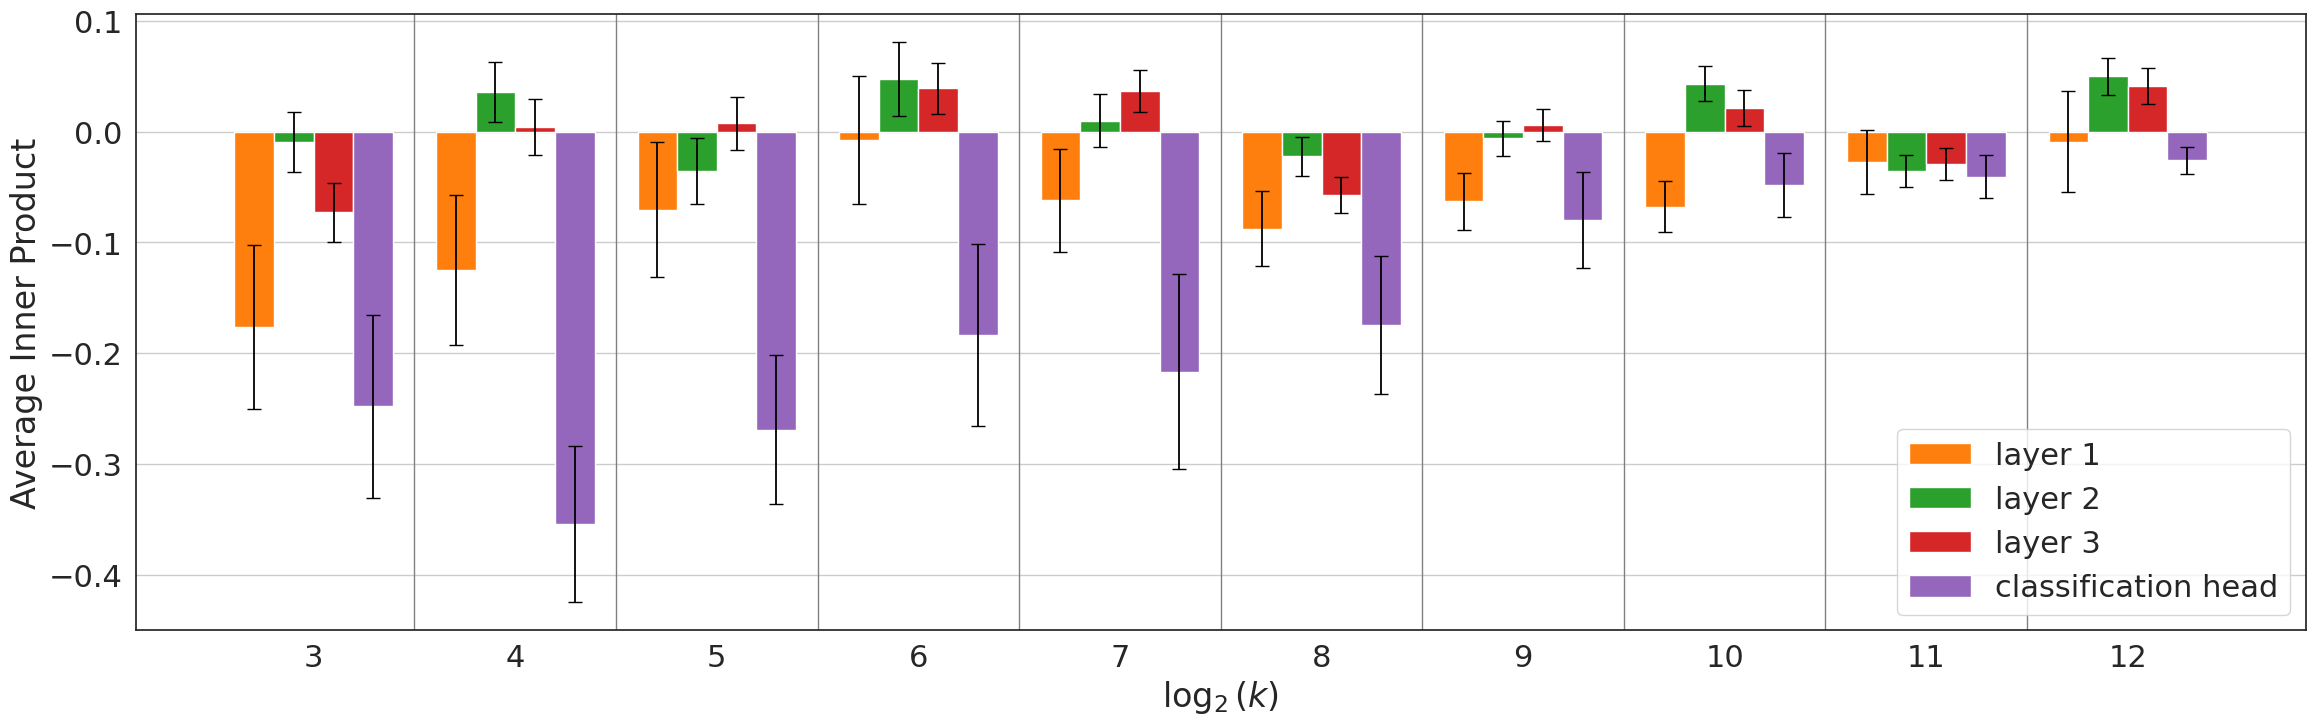

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


for_appendix = True
# Sample data
if for_appendix:
    categories_indices =  [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,] #
else:
    categories_indices =  [2, 4, 8, 12]#, 12,] #
 
comparables_indices = [0, 1, 2, 3]
means = upper_tri.mean(-1)[categories_indices][:, comparables_indices]
errors = (upper_tri.std(-1, unbiased=True) / np.sqrt(upper_tri.size(-1))) [categories_indices][:, comparables_indices]


# plt.figure(figsize=(10, 10))

colors = sns.color_palette("tab10", n_colors=30)[1:]

if for_appendix:
    w = 2.4
    margin =  2.6
    plt.figure(figsize=(28, 8))
    adjust_plots(font_scale=2.0)
else:
    w = 2.4
    margin =  4.6
    plt.figure(figsize=(6.0, 5.0))
    # read the current figure size
    figsize = plt.gcf().get_size_inches()
    print(figsize)
    adjust_plots()
    



for i in range(len(categories_indices)):
    for j in range(len(comparables_indices)):
        if i == 0:
            label = f"layer {comparables_indices[j] + 1}"
            if comparables_indices[j] == 3:
                label = "classification head"
                
        else:
            label = None
        plt.bar(i * len(comparables_indices) * w + j * w + margin * i, means[i, j], yerr=errors[i, j]/2, width = w, color=colors[comparables_indices[j]], label=label, capsize=w * 2)

plt.xlabel(x_label)
plt.ylabel('Average Inner Product')
new_xticks = np.arange(len(categories_indices)) * len(comparables_indices) * w + (len(comparables_indices) - 1) * w / 2 + margin * np.arange(len(categories_indices))

plt.xticks(new_xticks, [int (i) for i in x_ticks[categories_indices]])

locations_of_vertical_lines = np.arange(len(categories_indices)) * len(comparables_indices) * w + (len(comparables_indices) - 1) * w + margin * np.arange(len(categories_indices)) + w / 2 + margin / 2

for loc in locations_of_vertical_lines[:-1]:
    plt.axvline(loc, color='gray', linewidth=1)


plt.legend()
plt.grid(axis='y')
if for_appendix:
    pass
    plt.savefig(f'Figs/Appendix/exp2_full_inner_product.png', bbox_inches='tight', dpi=300)
else:
    pass
    plt.savefig(f'Figs/Experiments/exp2_inner_product.png', bbox_inches='tight', dpi=300)
plt.show()
